# Atividade 01 - Projeto Integrado por Computador

### Tema: Ciclo de Refrigeração com R134a
---

Aluno: Abner Vieira Pereira

In [38]:
# Importação de bibliotecas
from numpy import *
import numpy as np
from sympy import *
import sympy as sy
import CoolProp.CoolProp as CP
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt

# Enunciado

Um refrigerador utiliza o refrigerante R-134a como fluido de trabalho e opera em um ciclo de refrigeração por compressão de vapor ideal entre 0,12 e 0,8 MPa. A taxa de fluxo de massa do refrigerante é de 0,025 kg/s. Mostre o ciclo em um diagrama T-s (Temperatura vs Entropia) em relação às linhas de saturação. Determine (a) a taxa de remoção de calor do espaço refrigerado e a potência de entrada no compressor, (b) a taxa de rejeição de calor para o ambiente e (c) o coeficiente de performance (COP).

In [39]:
# Declarando as variáveis 

P_evap = 0.12e6      #em Pa
P_cond = 0.8e6       #em Pa
m_ponto = 0.025      #em kg/s


## 1.0 Cálculo das propriedades em cada ponto

### 1° Ponto - Entrada do compressor e saída do evaporador

Nessas condições, a pressão é igual à pressão de evaporação P1 = P_evap e o título da substância é igual a 1.

In [40]:
T_1 = CP.PropsSI('T','P',P_evap,'Q',1,'R134a')
T_1_C = T_1 - 273.15
print(f'A temperatura na entrada do compressor é {T_1:.2f} K ou {T_1_C:.2f} °C.')

A temperatura na entrada do compressor é 250.84 K ou -22.31 °C.


In [41]:
H_1 = CP.PropsSI('H','P',P_evap,'Q',1,'R134a')
H_1_conv = H_1/1000
print(f'A entalpia antes do compressor é {H_1_conv:.2f} kJ/kg.')

A entalpia antes do compressor é 385.12 kJ/kg.


In [42]:
S_1 = CP.PropsSI('S','P',P_evap,'Q',1,'R134a')
S_1_conv = S_1/1000
print(f'A entropia na entrada do compressor é {S_1_conv:.2f} KJ/kg.')

A entropia na entrada do compressor é 1.74 KJ/kg.


### 2° Ponto - Saída do compressor e entrada no condensador

Essa transformação é isoentrópica, dessa forma s1 = s2 e a pressão é a pressão de condensação, P2 = P_cond.

In [43]:
T_2 = CP.PropsSI('T','S',S_1,'P',P_cond,'R134a')
T_2_C = T_2 - 273.15
print(f'A temperatura na saída do compressor é {T_2_C:.2f}°C.')

A temperatura na saída do compressor é 39.95°C.


In [44]:
H_2 = CP.PropsSI('H','S',S_1,'P',P_cond,'R134a')
H_2_conv = H_2/1000
print(f'A entalpia na saída do compressor é {H_2_conv:.2f} KJ/kg.')

A entalpia na saída do compressor é 424.54 KJ/kg.


In [45]:
Q_2 = CP.PropsSI('Q','S',S_1,'P',P_cond,'R134a')
Q_2

-1.0

### 3° Ponto - Saída do evaporador e entrada da junta de expansão

Essa transformação é isobárica, de forma que P3 = P2 = P_cond, e estamos na região de líquido saturado, logo, o título nessa condição é igual a 0.

In [46]:
T_3 = CP.PropsSI('T','P',P_cond,'Q',0,'R134a')
T_3_C = T_3 - 273.15
print(f'A temperatura na saída do condensador é {T_3_C:.2f}°C.')

A temperatura na saída do condensador é 31.33°C.


In [47]:
H_3 = CP.PropsSI('H','P',P_cond,'Q',0,'R134a')
H_3_conv = H_3/1000
print(f'A entalpia na saída do condensador é {H_3_conv:.2f} KJ/kg.')

A entalpia na saída do condensador é 243.65 KJ/kg.


In [48]:
S_3 = CP.PropsSI('S','P',P_cond,'Q',0,'R134a')
S_3_conv = S_3/1000
print(f'A entalpia na saída do condensador é {S_3_conv:.2f} KJ/kg.')

A entalpia na saída do condensador é 1.15 KJ/kg.


### 4° Ponto - Saída da junta de expansão e entrada na unidade evaporadora

Essa transformação é isoentalpica de forma que h4 é igual a h3 e isobárica, logo P4 = P1 = P_evap

In [49]:
T_4 = CP.PropsSI('T','P',P_evap,'H',H_3,'R134a')
T_4_C = T_4 - 273.15
print(f'A temperatura na saída da junta de expansão é {T_4_C:.2f}°C')

A temperatura na saída da junta de expansão é -22.31°C


In [50]:
S_4 = CP.PropsSI('S','P',P_evap,'H',H_3,'R134a')
S_4_conv = S_4/1000
print(f'A entropia na saída da junta de expansão é {S_4_conv:.2f} KJ/kg')

A entropia na saída da junta de expansão é 1.18 KJ/kg


In [51]:
Q_4 = CP.PropsSI('Q','P',P_evap,'H',H_3,'R134a')
Q_4 = np.round(Q_4,2)
print(f'O título na saída da junta de expansão é {Q_4}.')

O título na saída da junta de expansão é 0.34.


## 2.0 Criando um dataframe para armazenar as propiredades

In [52]:
dados = {
    'Ponto': ['Ponto 1', 'Ponto 2', 'Ponto 3', 'Ponto 4'],
    'Temperatura (°C)': [T_1_C, T_2_C, T_3_C, T_4_C],
    'Pressão (kPa)': [P_evap / 1e3, P_cond / 1e3, P_cond / 1e3, P_evap / 1e3],
    'Entropia (kJ/kg·K)': [S_1_conv, S_1_conv, S_3_conv, S_4_conv],
    'Entalpia (kJ/kg)': [H_1_conv, H_2_conv, H_3_conv, H_3_conv]
}

# Convertendo os dados para um DataFrame
df_dados = pd.DataFrame(dados)

# Exibindo o DataFrame
df_dados.head()


,Ponto,Temperatura (°C),Pressão (kPa),Entropia (kJ/kg·K),Entalpia (kJ/kg)
0,Ponto 1,-22.309510,120.0,1.743454,385.123566
1,Ponto 2,39.949480,800.0,1.743454,424.541297
2,Ponto 3,31.327463,800.0,1.149747,243.645406
3,Ponto 4,-22.309510,120.0,1.179438,243.645406


## 3.0 Plotagem dos gráficos T-s

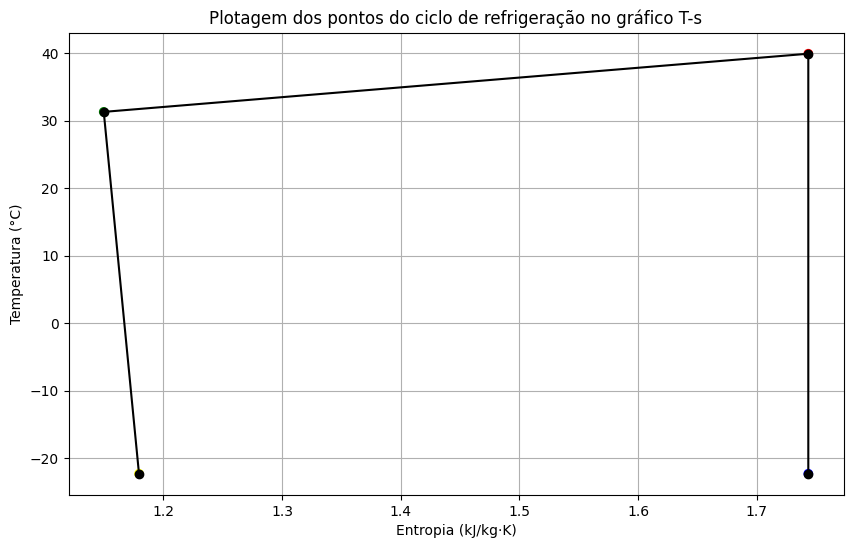

In [53]:
# Plotagem dos pontos
plt.figure(figsize=(10,6))
plt.scatter(df_dados['Entropia (kJ/kg·K)'],df_dados['Temperatura (°C)'],
            color=['blue', 'red', 'green', 'yellow'], label=df_dados['Ponto'])


plt.plot(df_dados['Entropia (kJ/kg·K)'], df_dados['Temperatura (°C)'], 'o-', color='black')
# Adicionar rótulos e título
plt.title('Plotagem dos pontos do ciclo de refrigeração no gráfico T-s')
plt.xlabel('Entropia (kJ/kg·K)')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20400\3482325112.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([S_1_conv, S_1_conv, S_3_conv, S_4_conv, S_1_conv],


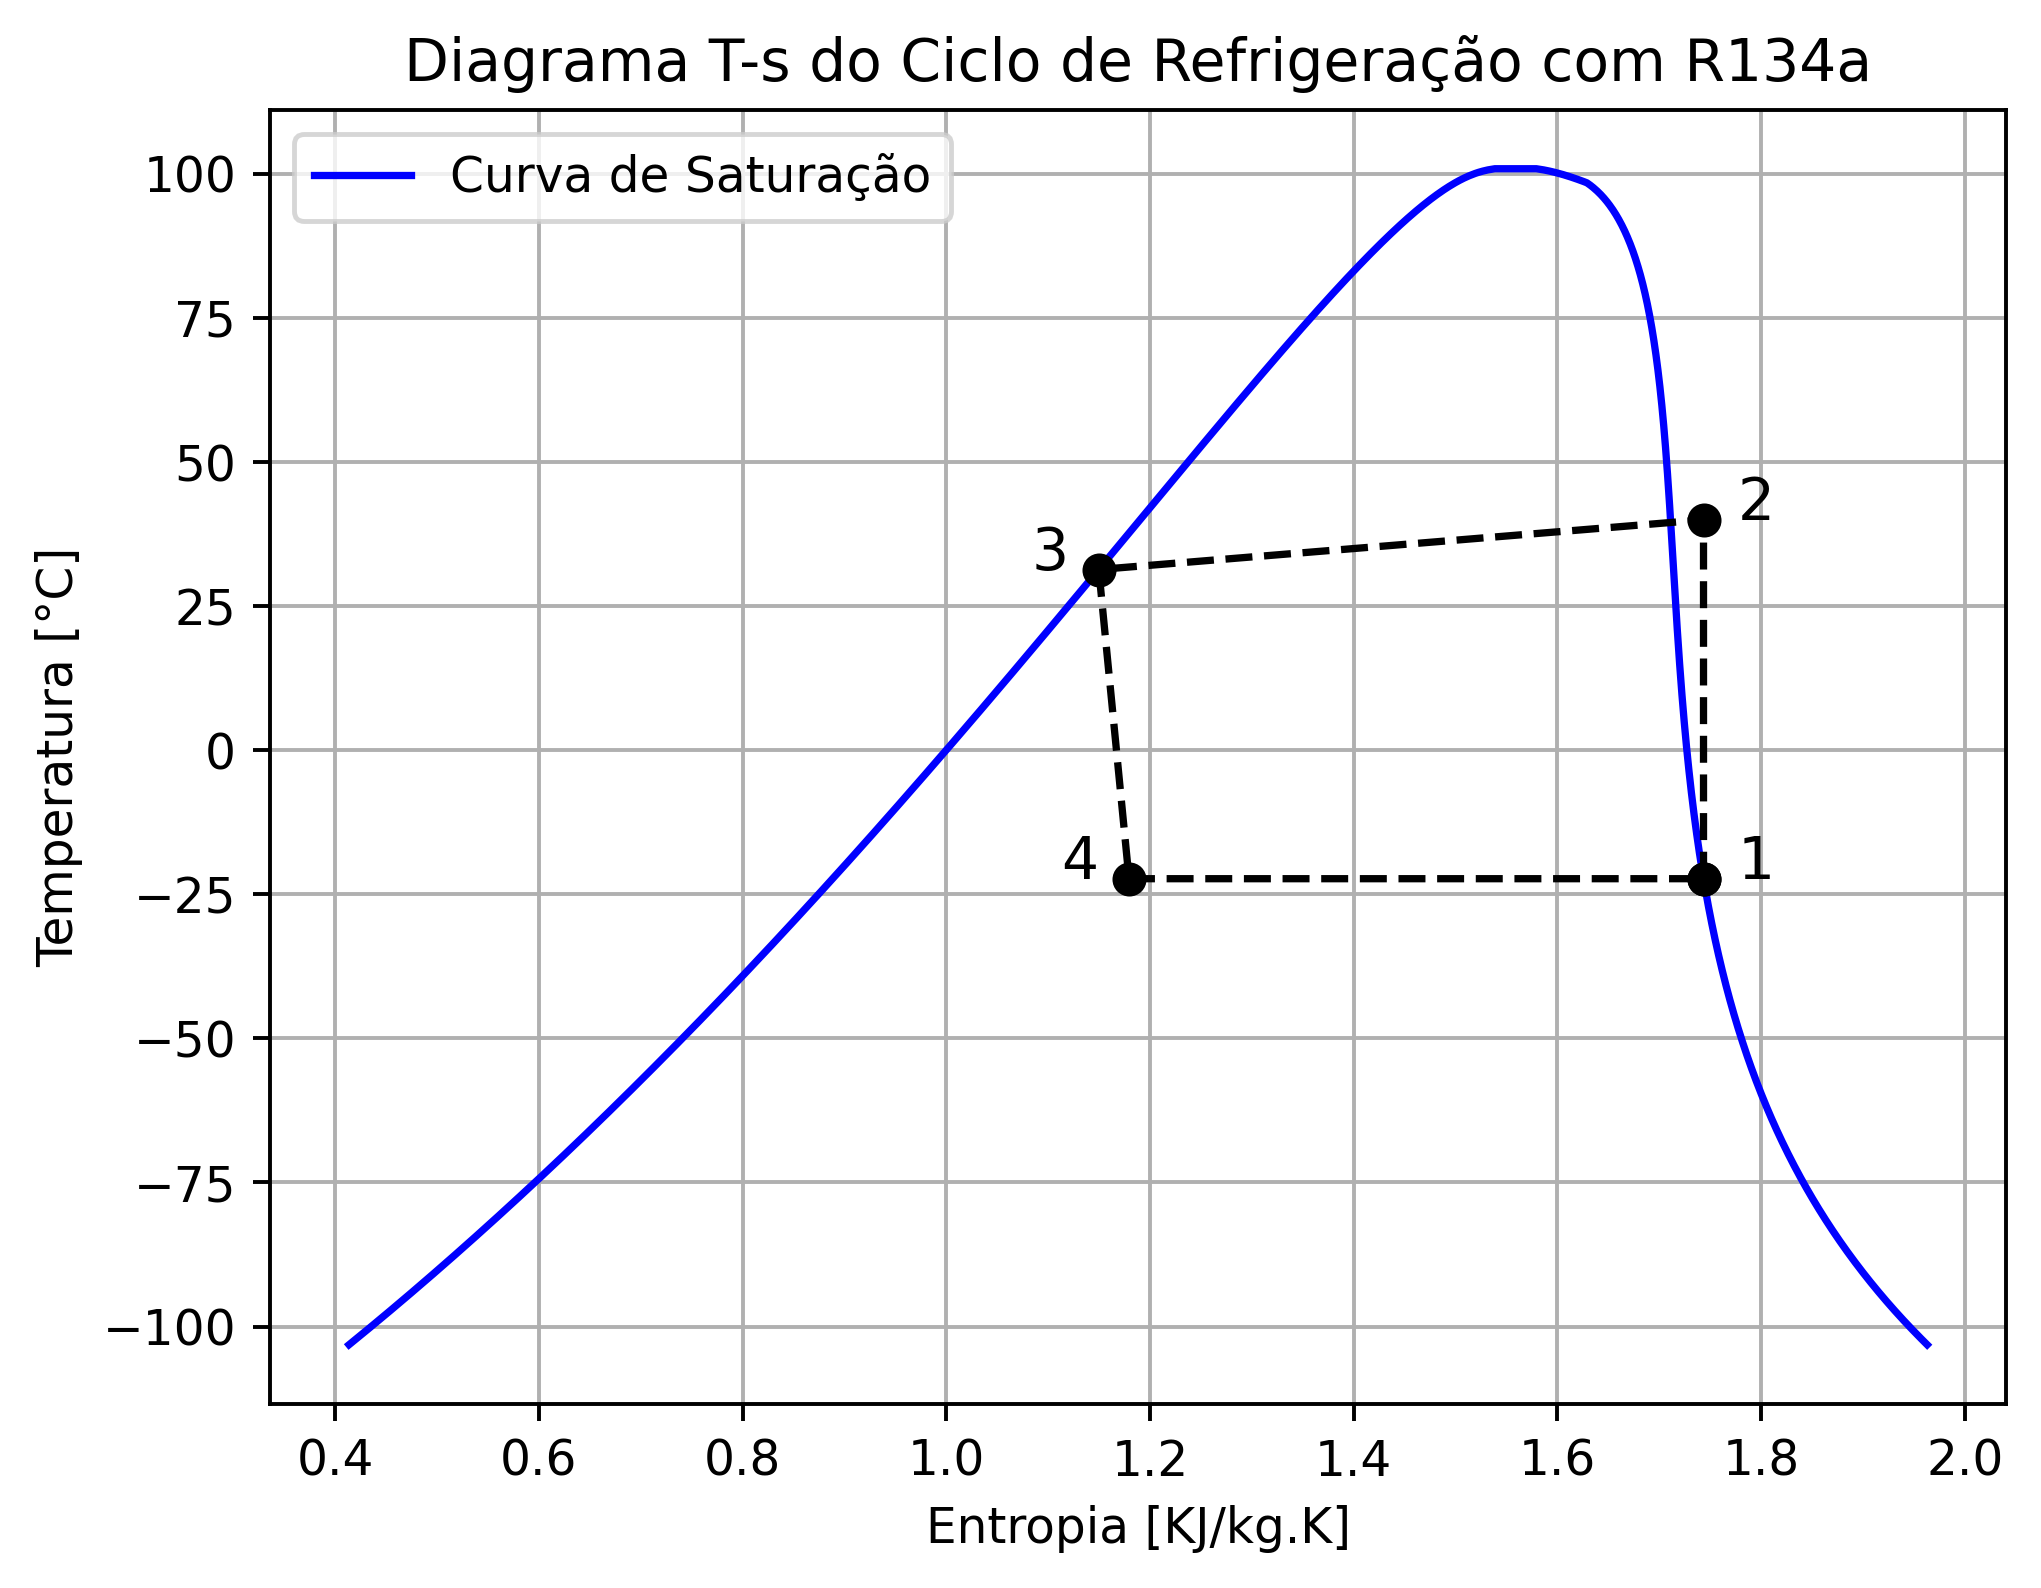

In [54]:
#--- PLOTAGEM DO GRÁFICO ---

# Definindo os limites de temperatura válidos para o R134a
T_min = 170
T_max = 374

# Criando vetores de temperatura
T_values = np.linspace(T_min,T_max,1000)

# Calculando as entropias de saturação
s_liq = [CP.PropsSI('S','T',T,'Q',0,'R134a') / 1000 for T in T_values] #Saturação Líquido
s_vap = [CP.PropsSI('S','T',T,'Q',1,'R134a') / 1000 for T in T_values] #Saturação vapor

# Convertendo temperatura para Celsius
T_values_c = T_values - 273.15

# Criando um vetor de entropia unificado
s_values = np.concatenate((s_liq, s_vap[::-1]))  # Concatena valores de líquido e vapor
T_values_C_combined = np.concatenate((T_values_c, T_values_c[::-1]))  # Concatena temperatura

# Fazendo a plotagem da curva de saturação
plt.figure(dpi=350)
plt.plot(s_values, T_values_C_combined, label='Curva de Saturação',color='blue')

# Plota as linhas entre os pontos do ciclo
plt.plot([S_1_conv, S_1_conv, S_3_conv, S_4_conv, S_1_conv], 
         [T_1_C, T_2_C, T_3_C, T_4_C, T_1_C], 
         'k--', marker='o', color='black')

# Adicionando enumeração nos pontos do ciclo
plt.text(S_1_conv + 0.07, T_1_C, '1', fontsize=12, ha='right', color='black')
plt.text(S_1_conv + 0.07, T_2_C, '2', fontsize=12, ha='right', color='black')
plt.text(S_3_conv - 0.03, T_3_C, '3', fontsize=12, ha='right', color='black')
plt.text(S_4_conv - 0.03, T_4_C, '4', fontsize=12, ha='right', color='black')

# Configurações do gráfico
plt.title('Diagrama T-s do Ciclo de Refrigeração com R134a')
plt.xlabel('Entropia [KJ/kg.K]')
plt.ylabel('Temperatura [°C]')
plt.grid(True)
plt.legend()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20400\9514068.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([H_1_conv, H_2_conv, H_3_conv, H_3_conv, H_1_conv],


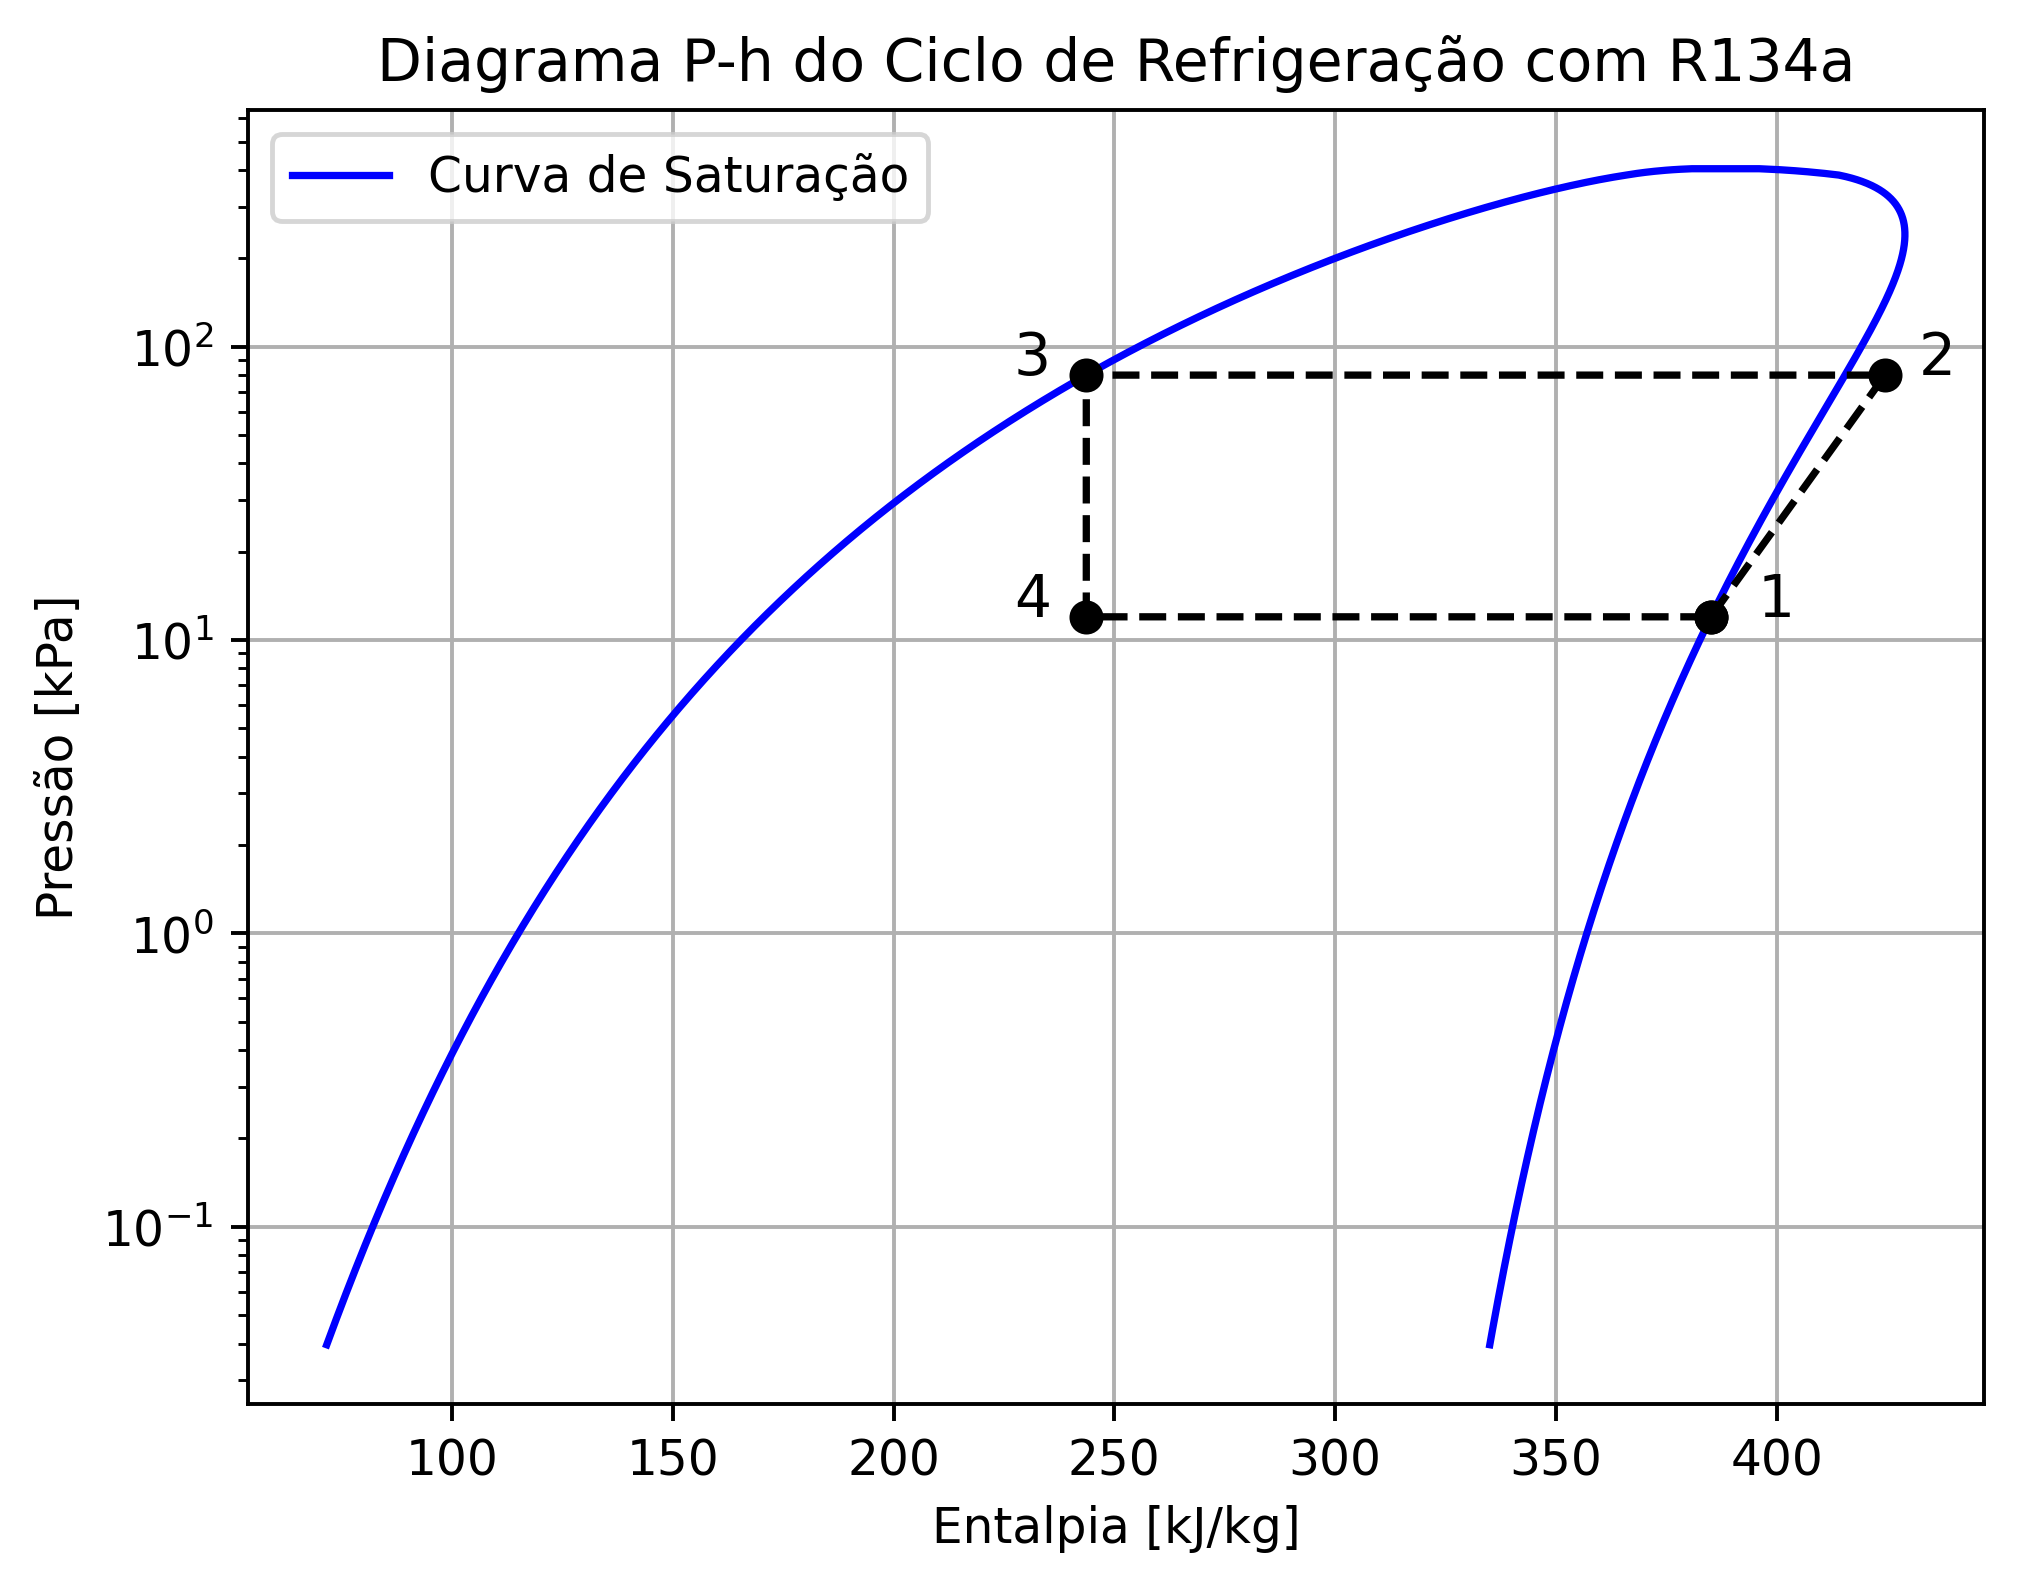

In [55]:
#---PLOTAGEM DO DIAGRAMA P-h---#

# Calculando as entalpias de saturação (J/kg)
h_liq = [CP.PropsSI('H', 'T', T, 'Q', 0, 'R134a') / 1000 for T in T_values]  # Saturação Líquido
h_vap = [CP.PropsSI('H', 'T', T, 'Q', 1, 'R134a') / 1000 for T in T_values]  # Saturação Vapor

# Calculando as pressões de saturação (Pa)
P_values = [CP.PropsSI('P', 'T', T, 'Q', 0, 'R134a') / 10e3 for T in T_values]  # Convertendo de Pa para bar

# Criando um vetor de entalpia unificado
h_values = np.concatenate((h_liq, h_vap[::-1]))  # Concatena valores de líquido e vapor
P_values_combined = np.concatenate((P_values, P_values[::-1]))  # Concatena pressão

# Fazendo a plotagem da curva de saturação
plt.figure(dpi=350)
plt.plot(h_values, P_values_combined, label='Curva de Saturação', color='blue')

# Plota as linhas entre os pontos do ciclo
plt.plot([H_1_conv, H_2_conv, H_3_conv, H_3_conv, H_1_conv], 
         [P_evap/10e3, P_cond/10e3 , P_cond/10e3, P_evap/10e3, P_evap/10e3], 
         'k--', marker='o', color='black')

# Adicionando enumeração nos pontos do ciclo
plt.text(H_1_conv + 19, P_evap / 10e3, '1', fontsize=12, ha='right', color='black')
plt.text(H_2_conv + 16, P_cond / 10e3, '2', fontsize=12, ha='right', color='black')
plt.text(H_3_conv - 8, P_cond / 10e3, '3', fontsize=12, ha='right', color='black')
plt.text(H_3_conv - 8, P_evap / 10e3, '4', fontsize=12, ha='right', color='black')

# Configurações do gráfico
plt.title('Diagrama P-h do Ciclo de Refrigeração com R134a')
plt.xlabel('Entalpia [kJ/kg]')
plt.ylabel('Pressão [kPa]')
plt.yscale('log')  # Escala logarítmica para a pressão
plt.grid(True)
plt.legend()
plt.show()


## 4.0 (a) Cáluclo da taxa de remoção de calor e da potência de entrada no compressor

A taxa de remoção de calor pelo evaporador é a quantidade de calor removida do espaço refrigerado e é calculada por:

$$\dot{Q}_{ref} = \dot{m}(h_1 - h_4)$$ 

In [56]:
Q_ref = m_ponto*(H_1_conv - H_3_conv)
print(f'A taxa de remoção de calor nesse sistema é {Q_ref:.3f} kW.')

A taxa de remoção de calor nesse sistema é 3.537 kW.


A potência de entrada no compressor pode ser determinada a partir da seguinte equação:

$$W_{comp} = \dot{m}(h_2 - h_1)$$

In [57]:
W_comp = m_ponto*(H_2_conv - H_1_conv)
print(f'A potência de entrada no compressor é {W_comp:.3f} kW.')

A potência de entrada no compressor é 0.985 kW.


## (b) Taxa de rejeição de calor

A taxa de rejeição de calor pelo condensador é a quantidade de calor transferida para o ambiente externo e é dado pela fórmula:

$$\dot{Q}_{cond} = \dot{m}(h_2 - h_3)$$

In [58]:
Q_cond = m_ponto*(H_2_conv - H_3_conv)
print(f'A taxa de rejeição de calor é {Q_cond:.3f} kW.')

A taxa de rejeição de calor é 4.522 kW.


## (c) Coeficiente de performance

O coeficiente de performance (COP) indica a eficiência de um ciclo de refrigeração e é a razão entre a capacidade de refrigeração e o trabalho de compressão, dada pela fórmula:

$$COP = \dfrac{\dot{Q}_{evap}}{W_{comp}}$$

## (d) Coeficiente de performance máximo e calor de refrigeração máximo

O coeficiente de performance (COP) máximo de um ciclo de refrigeração é dado pela eficiência de Carnot, que é dado pela fórmula:

$$COP_{máx} = \dfrac{T_C}{T_H - T_C}$$

In [59]:
cop_max = T_1 / (T_2 - T_1)
print(f'Sendo T_c = {T_1:.2f}K e T_h = {T_2:.2f}K temos COP_máx = {cop_max:.3f}.')

Sendo T_c = 250.84K e T_h = 313.10K temos COP_máx = 4.029.


Para calcular o calor de refrigeração máximo usa-se a seguinte fórmula:

$$Q_{ref}^{máx} = COP_{máx} \times W_{comp}$$

In [60]:
Q_ref_max = cop_max * W_comp
print(f'O calor máximo removido é igual a {Q_ref_max:.3f} kW.')

O calor máximo removido é igual a 3.970 kW.


In [61]:
COP = Q_evap/W_comp
print(f'O coeficiente de operação é {COP:.3f}.')

O coeficiente de operação é 3.589.


In [63]:
resultados = {
    'Q_ref [kW]': [Q_ref],
    'W_comp [kW]': [W_comp],
    'Q_cond [kW]': [Q_cond],
    'COP': [COP],
    'COP_máx': [cop_max],
    'Q_ref_max [kW]':[Q_ref_max]
}

results = pd.DataFrame(resultados)
results = results.round(3)
results.head()

,Q_ref [kW],W_comp [kW],Q_cond [kW],COP,COP_máx,Q_ref_max [kW]
0,3.537,0.985,4.522,3.589,4.029,3.97
